### In this notebook we are going to study the effect of selecting a subset of features from the original features on the prediction score 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import sys
import os
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,os.path.join(parentdir,"src")) 
import utils
import imputer
import classifier
import feature_importance
%matplotlib inline
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"]=20,10
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import f1_score,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


# Features distributions and dependencies


In [2]:
paths = ["../data/AMF_train_X_XCZw8r3.csv","../data/AMF_test_X_uDs0jHH.csv","../data/AMF_train_Y_omYQJZL.csv"]
X, X_test, y_trader = utils.load_data(paths)
X_train, X_validation, y_train, y_validation,traders_train, traders_validation = utils.prepare_split_data(X,
                                        stratify=True,test_size=0.2)



/home/anas/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anas/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


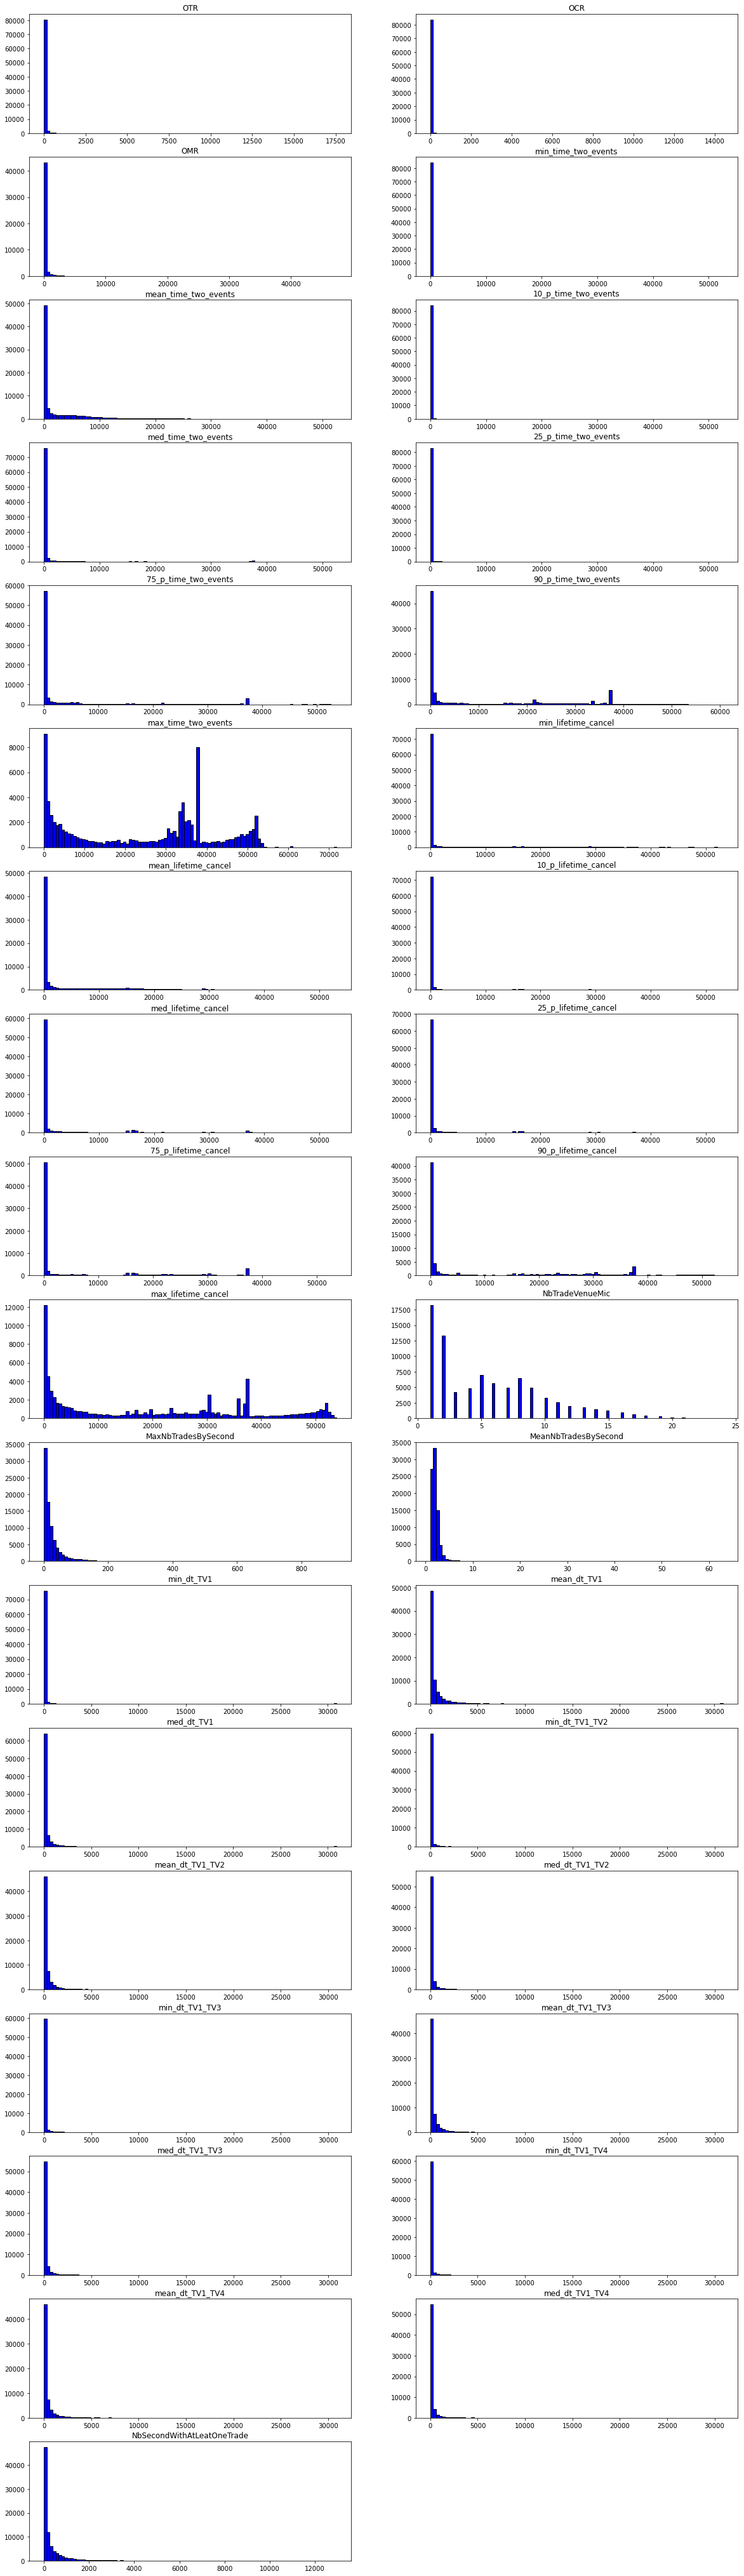

In [9]:
plt.rcParams["figure.figsize"]=20,140
for index,col in enumerate(X_train.columns.values):
    ax = plt.subplot(34, 2, index + 1)
    ax.hist(X_train[col], bins = 100,
             color = 'blue', edgecolor = 'black')
    ax.set_title('{}'.format(col))

plt.show()

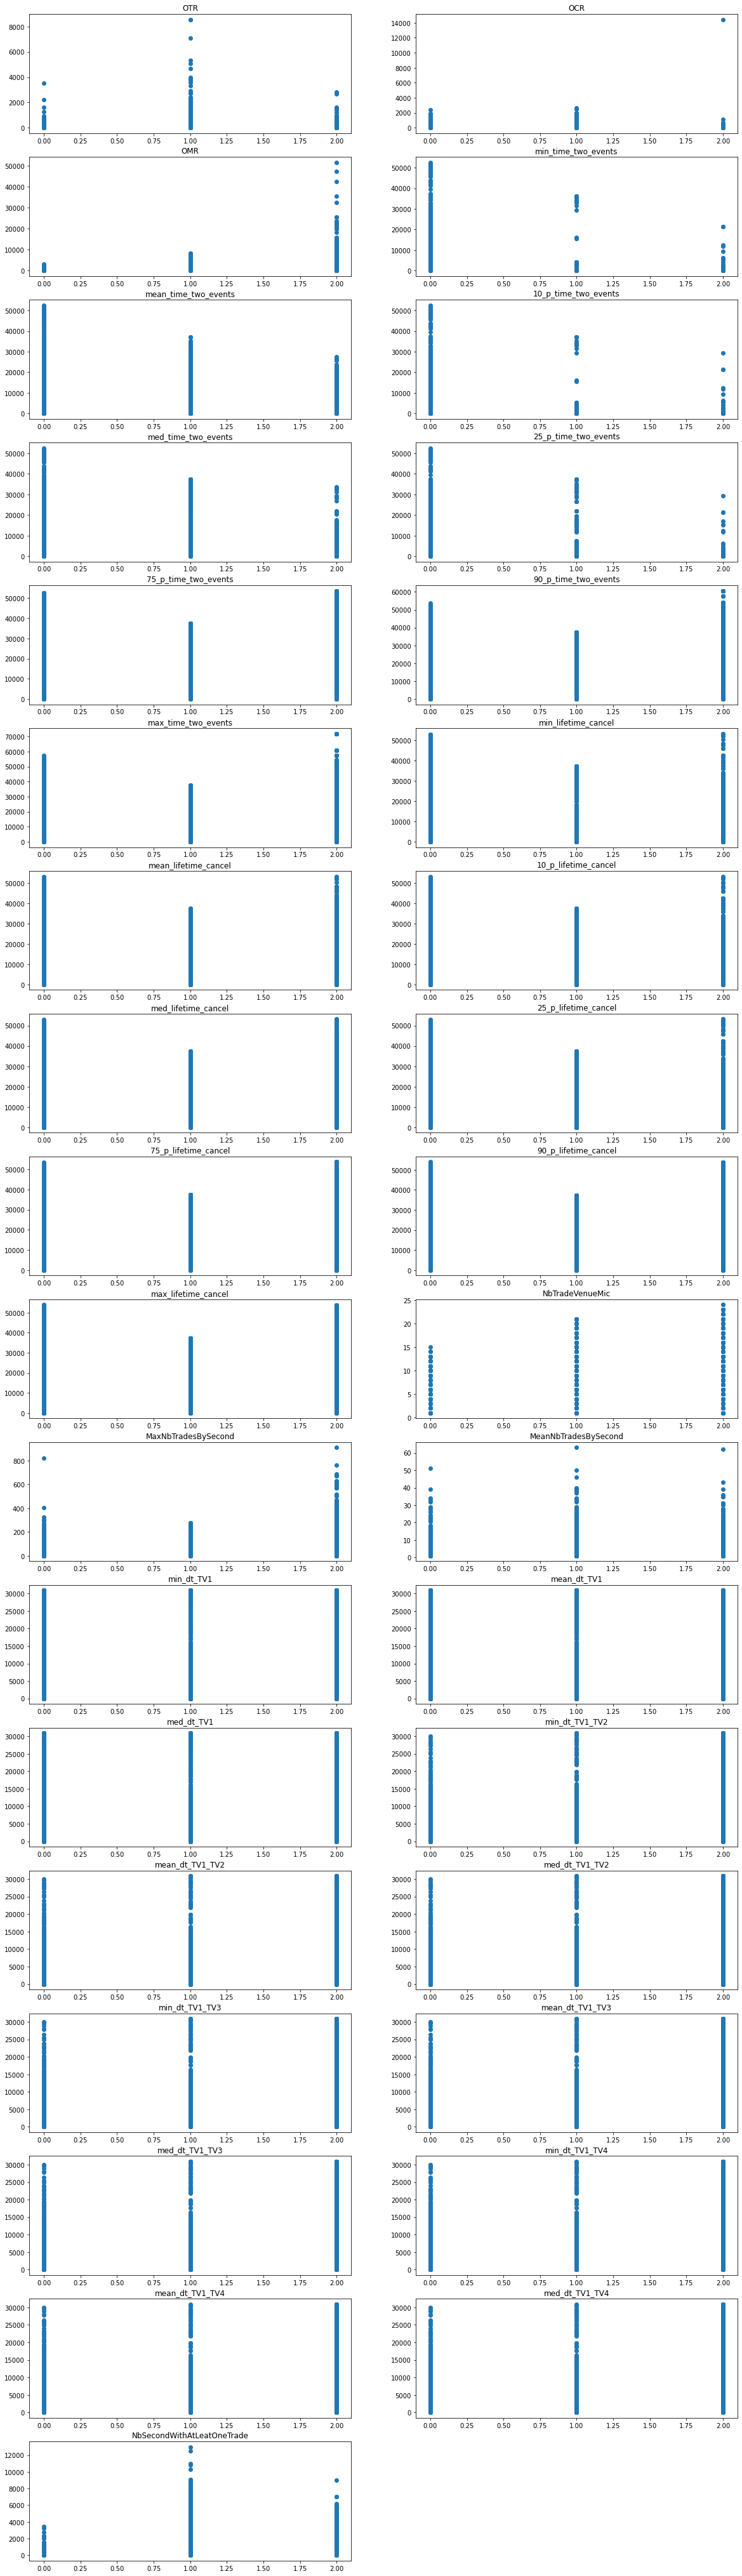

In [12]:
plt.rcParams["figure.figsize"]=20,140
for index,col in enumerate(X_train.columns.values):
    ax = plt.subplot(34, 2, index + 1)
    ax.scatter(y_train,X_train[col])
    ax.set_title('{}'.format(col))

plt.show()

# Feature selection with anova test

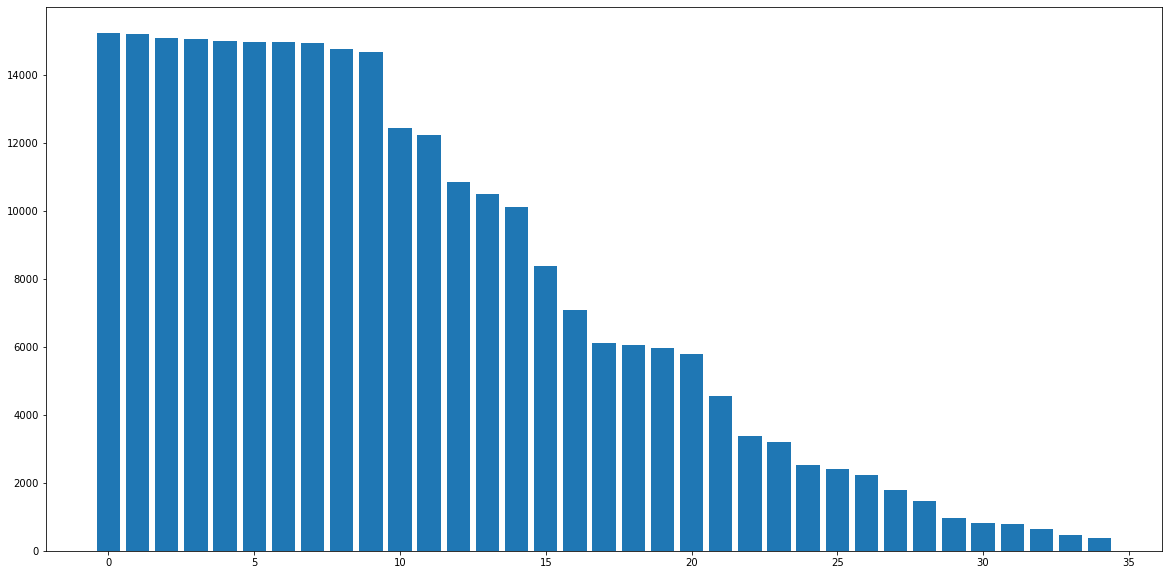

Score
mean_dt_TV1_TV3             15228.331367
mean_dt_TV1_TV2             15196.395450
med_dt_TV1_TV3              15085.447821
med_dt_TV1_TV2              15047.310686
min_dt_TV1_TV3              14982.877254
mean_lifetime_cancel        14973.910951
mean_dt_TV1_TV4             14953.380958
min_dt_TV1_TV2              14938.649832
med_dt_TV1_TV4              14766.932851
min_dt_TV1_TV4              14658.973042
OMR                         12449.930869
NbTradeVenueMic             12235.695278
90_p_lifetime_cancel        10840.301689
mean_time_two_events        10489.193945
75_p_lifetime_cancel        10121.709055
med_lifetime_cancel          8390.696050
90_p_time_two_events         7091.711825
25_p_lifetime_cancel         6109.289211
min_lifetime_cancel          6052.658550
max_time_two_events          5973.166515
10_p_lifetime_cancel         5795.365829
MaxNbTradesBySecond          4548.384815
75_p_time_two_events         3380.729606
max_lifetime_cancel          3210.102062
NbSecondWithAtLeatOneTrade   2526.700660
mean_dt_TV1                  2410.953944
med_time_two_events          2240.694619
med_dt_TV1                   1800.773226
min_dt_TV1                   1463.463842
25_p_time_two_events          976.252249
OTR                           829.217947
OCR                           794.702340
MeanNbTradesBySecond          650.350719
10_p_time_two_events          456.184757
min_time_two_events           363.084274

In [3]:
plt.rcParams["figure.figsize"]=20,10
fs_anova = feature_importance.rank_features(X_train,y_train,"anova")
df_anova = feature_importance.display_ranking(fs_anova)
display(df_anova)

# Feature selection with mutual information

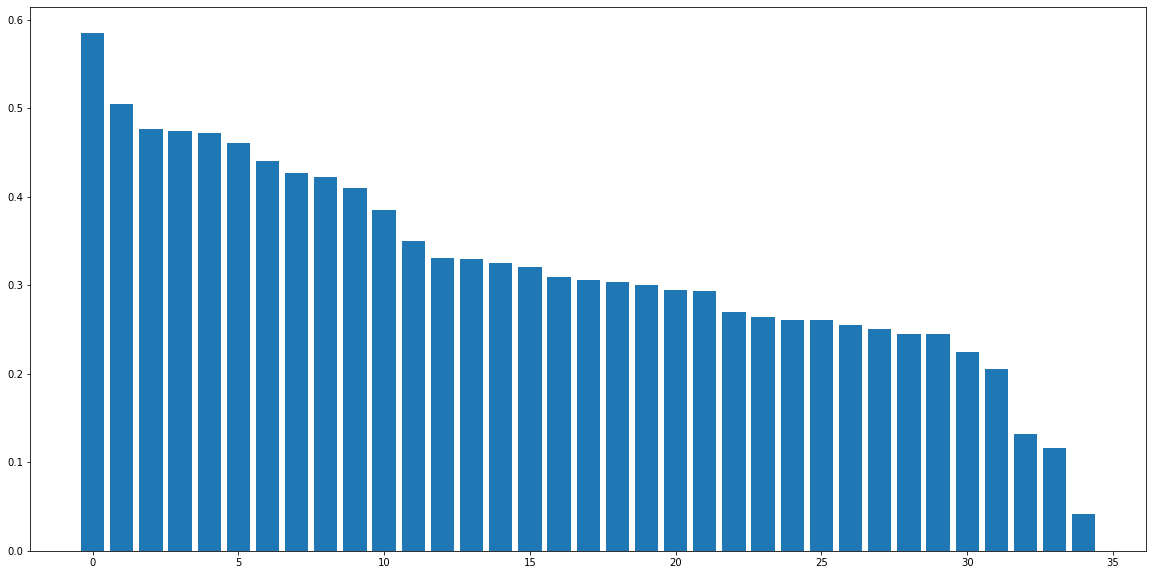

Score
min_lifetime_cancel         0.585180
10_p_lifetime_cancel        0.504488
max_time_two_events         0.476838
25_p_lifetime_cancel        0.474415
med_lifetime_cancel         0.472012
75_p_lifetime_cancel        0.460923
90_p_lifetime_cancel        0.440124
90_p_time_two_events        0.426706
max_lifetime_cancel         0.422594
OCR                         0.410608
75_p_time_two_events        0.384692
mean_lifetime_cancel        0.349842
mean_time_two_events        0.331495
min_dt_TV1_TV3              0.330041
min_dt_TV1_TV2              0.325393
med_time_two_events         0.321046
min_dt_TV1_TV4              0.309956
med_dt_TV1_TV2              0.306371
25_p_time_two_events        0.303747
med_dt_TV1_TV3              0.300221
OTR                         0.295045
med_dt_TV1_TV4              0.293443
med_dt_TV1                  0.269366
min_dt_TV1                  0.263963
mean_dt_TV1_TV3             0.261028
mean_dt_TV1_TV2             0.260430
mean_dt_TV1_TV4             0.255242
10_p_time_two_events        0.250981
NbTradeVenueMic             0.245446
mean_dt_TV1                 0.245359
OMR                         0.225184
MeanNbTradesBySecond        0.205763
NbSecondWithAtLeatOneTrade  0.132312
MaxNbTradesBySecond         0.116462
min_time_two_events         0.041633

In [4]:
fs_mutual = feature_importance.rank_features(X_train,y_train,"mutual")
df_mutual = feature_importance.display_ranking(fs_mutual)
display(df_mutual)

# Feature selection with Random Forest Feature importance

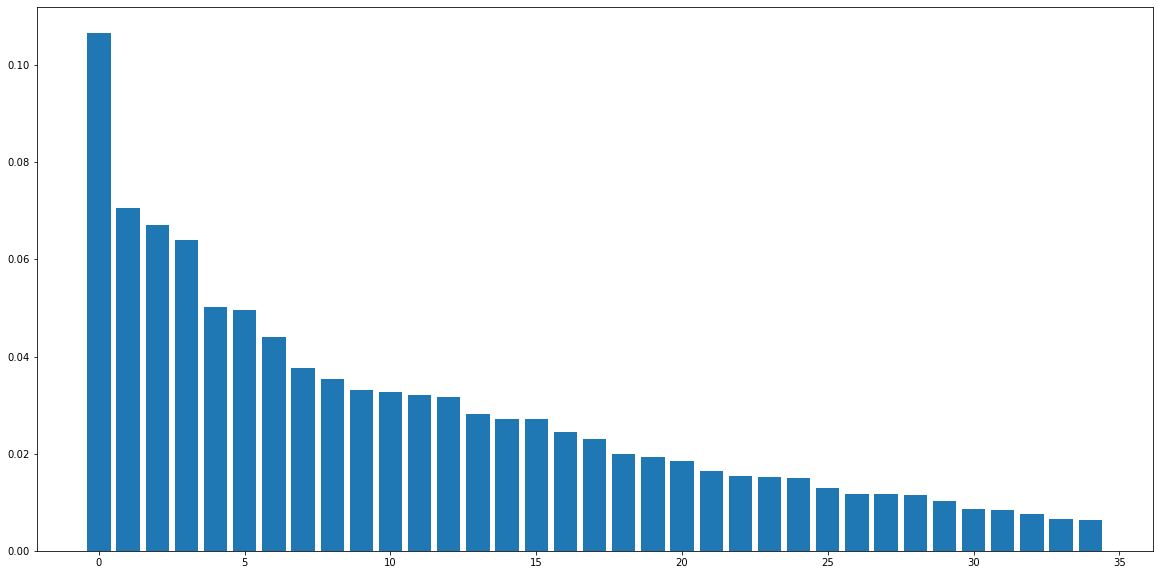

Score
min_lifetime_cancel         0.106612
OMR                         0.070562
OCR                         0.067023
10_p_lifetime_cancel        0.064068
NbTradeVenueMic             0.050108
25_p_lifetime_cancel        0.049541
max_time_two_events         0.044046
med_lifetime_cancel         0.037563
mean_time_two_events        0.035415
90_p_time_two_events        0.033095
OTR                         0.032633
75_p_lifetime_cancel        0.032120
min_dt_TV1_TV2              0.031772
min_dt_TV1                  0.028246
mean_lifetime_cancel        0.027235
min_dt_TV1_TV3              0.027192
max_lifetime_cancel         0.024437
90_p_lifetime_cancel        0.023042
med_dt_TV1_TV2              0.019834
75_p_time_two_events        0.019218
min_dt_TV1_TV4              0.018497
10_p_time_two_events        0.016463
25_p_time_two_events        0.015438
med_dt_TV1_TV3              0.015208
MeanNbTradesBySecond        0.015076
med_time_two_events         0.012844
NbSecondWithAtLeatOneTrade  0.011792
med_dt_TV1                  0.011768
min_time_two_events         0.011425
MaxNbTradesBySecond         0.010161
mean_dt_TV1_TV3             0.008677
mean_dt_TV1_TV2             0.008336
mean_dt_TV1                 0.007671
med_dt_TV1_TV4              0.006477
mean_dt_TV1_TV4             0.006403

In [5]:
fs_RF = feature_importance.rank_features_RF(X_train,y_train)
display(fs_RF)

# Hypertunne the number of K selected params for anova and mutual information

In [6]:
anova_features = df_anova.index.values
mutual_features = df_mutual.index.values
RF_features = fs_RF.index.values
model = DecisionTreeClassifier()
f1_micro = make_scorer(f1_score,average='micro')

anova_scores = feature_importance.compare_score_k(anova_features,X_train,y_train,model,f1_micro)
display(anova_scores)

Number_of_features     Score
29                  30  0.956798
30                  31  0.956313
33                  34  0.956207
31                  32  0.955911
32                  33  0.955628
28                  29  0.955344
27                  28  0.954434
26                  27  0.953855
25                  26  0.953843
24                  25  0.953737
20                  21  0.953619
23                  24  0.952071
22                  23  0.952071
19                  20  0.951858
21                  22  0.951634
18                  19  0.947297
17                  18  0.934499
16                  17  0.930387
15                  16  0.921879
14                  15  0.921430
13                  14  0.917400
12                  13  0.908668
11                  12  0.889064
10                  11  0.874210
8                    9  0.810730
9                   10  0.810600
7                    8  0.808047
6                    7  0.804821
5                    6  0.803049
4                    5  0.708727
3                    4  0.664792
2                    3  0.660325
1                    2  0.638913
0                    1  0.619699

In [7]:
mutual_scores = feature_importance.compare_score_k(mutual_features,X_train,y_train,model,f1_micro)
display(mutual_scores)

Number_of_features     Score
30                  31  0.958405
31                  32  0.956963
33                  34  0.956325
32                  33  0.956290
28                  29  0.955746
29                  30  0.955202
27                  28  0.948691
24                  25  0.948325
23                  24  0.948290
25                  26  0.948290
26                  27  0.948195
22                  23  0.946151
21                  22  0.945253
20                  21  0.945004
19                  20  0.943941
18                  19  0.943551
16                  17  0.942913
17                  18  0.942617
15                  16  0.941743
14                  15  0.941601
13                  14  0.940609
8                    9  0.927362
12                  13  0.927031
10                  11  0.926594
11                  12  0.926428
9                   10  0.925471
7                    8  0.924987
6                    7  0.921371
5                    6  0.919433
4                    5  0.911374
3                    4  0.905465
2                    3  0.897300
1                    2  0.821412
0                    1  0.796431

In [8]:
RF_scores = feature_importance.compare_score_k(RF_features,X_train,y_train,model,f1_micro)
display(RF_scores)

Number_of_features     Score
21                  22  0.959445
22                  23  0.959137
23                  24  0.958889
28                  29  0.957920
24                  25  0.957826
30                  31  0.957495
26                  27  0.957459
20                  21  0.957377
29                  30  0.957365
32                  33  0.957353
25                  26  0.957329
31                  32  0.957270
19                  20  0.957211
33                  34  0.957046
18                  19  0.956963
17                  18  0.956833
27                  28  0.956833
16                  17  0.956727
15                  16  0.956408
14                  15  0.956219
13                  14  0.956136
12                  13  0.954174
11                  12  0.952106
9                   10  0.950901
10                  11  0.950298
8                    9  0.949897
6                    7  0.949625
7                    8  0.949223
5                    6  0.920012
4                    5  0.913087
3                    4  0.877684
2                    3  0.857288
1                    2  0.836160
0                    1  0.796431

# Observations

- With anova selected features we can select 20 best ranked features without decreasing the f1_micro score of the decision trees classifier from 0.95
- With mutual_info selected features we can select 29 best ranked features without decreasing the f1_micro score of the decision trees classifier from 0.95
- With RF_feature_importance selected features we can select 14 best ranked features without decreasing the f1_micro score of the decision trees classifier from 0.95


The new subsets of features to be tested from the results of this analysis are : 

In [10]:
print("Anova selected subset :",anova_features[:20])
print("RF selected subset :",RF_features[:14])

Anova selected subset : ['mean_dt_TV1_TV3' 'mean_dt_TV1_TV2' 'med_dt_TV1_TV3' 'med_dt_TV1_TV2'
 'min_dt_TV1_TV3' 'mean_lifetime_cancel' 'mean_dt_TV1_TV4'
 'min_dt_TV1_TV2' 'med_dt_TV1_TV4' 'min_dt_TV1_TV4' 'OMR'
 'NbTradeVenueMic' '90_p_lifetime_cancel' 'mean_time_two_events'
 '75_p_lifetime_cancel' 'med_lifetime_cancel' '90_p_time_two_events'
 '25_p_lifetime_cancel' 'min_lifetime_cancel' 'max_time_two_events']
RF selected subset : ['min_lifetime_cancel' 'OMR' 'OCR' '10_p_lifetime_cancel'
 'NbTradeVenueMic' '25_p_lifetime_cancel' 'max_time_two_events'
 'med_lifetime_cancel' 'mean_time_two_events' '90_p_time_two_events' 'OTR'
 '75_p_lifetime_cancel' 'min_dt_TV1_TV2' 'min_dt_TV1']
